# Getting Started

If you are interested in quickly identifying characters from other languages, look at the data here https://www.kaggle.com/mloey1/ahcd1


In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append("/home/john/source/fastai/")

In [3]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [4]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [6]:
PATH = "/home/john/data/arabicCharacters/"
sz=30

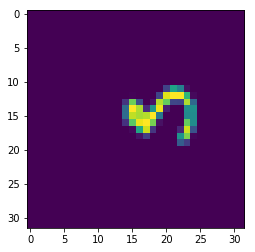

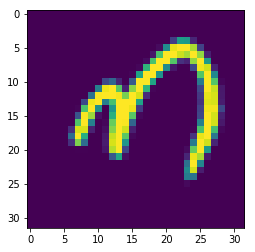

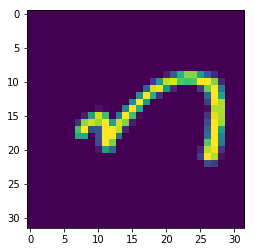

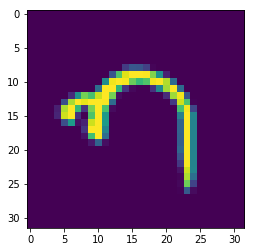

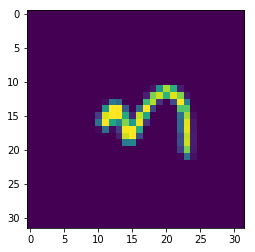

In [22]:
char_num = 18
files = os.listdir(f'{PATH}valid/{char_num}')[:5]
files
for f in files:
    plt.figure()
    img = plt.imread(f'{PATH}valid/{char_num}/{f}')
    plt.imshow(img);

In [15]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

100%|██████████| 42/42 [00:01<00:00, 36.25it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.599202   1.130326   0.637277  
    1      1.245619   0.916197   0.700149                   



[array([ 0.9162]), 0.70014880952380953]

[[91  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  1]
 [ 0 85  5  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  4  1]
 [ 3  7 82  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 1  0  0 67  2  8  1  0  0  0  0  6  3  3  1  0  0  1  0  1  0  1  0  0  0  0  1  0]
 [ 0  0  0  4 66  1 10  0  1  0  1  0  3  7  0  0  0  0  0  0  1  0  1  0  0  1  0  0]
 [ 0  0  0 12  3 68  2  1  0  0  0  0  3  0  1  0  2  0  3  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  6 20 60  1  0  0  0  0  1  2  0  0  0  0  0  0  0  1  1  0  0  0  0  0]
 [ 0  2  0  0  0  0  0 69 18  0  0  1  1  0  0  0  0  0  3  0  0  0  0  0  0  1  0  1]
 [ 0  0  2  0  3  0  0 30 58  0  0  0  1  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 48 13  0  0  0  0  0  0  1  1  0  0  0  1  5  3 24  0  0]
 [ 0  0  0  0  1  0  0  2  0  9 59  0  0  0  0  0  0  0  0  0  0  0  0  0  2 23  0  0]
 [ 0  0  1  4  0  1  0  0  0  1  0 74  0  0

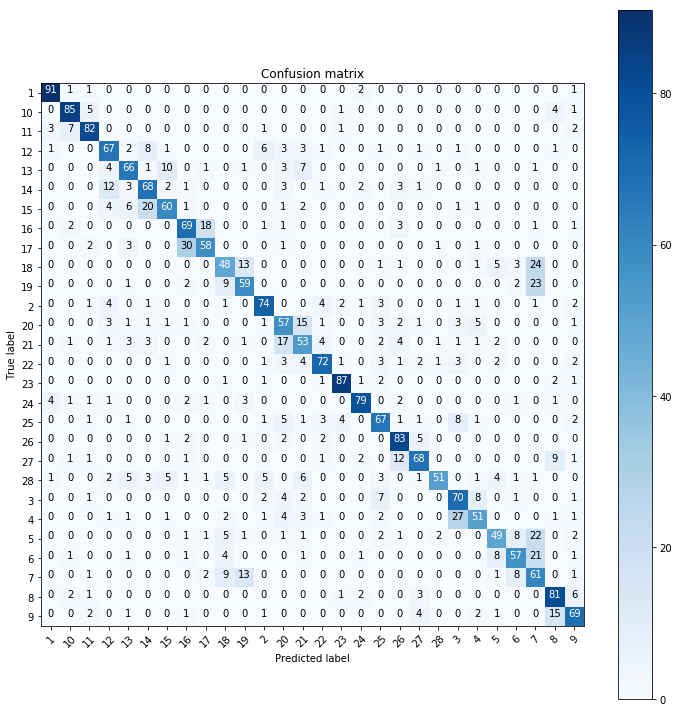

In [20]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(data.val_y, preds)
plot_confusion_matrix(cm, data.classes, figsize=(10,10))